BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_tr=pd.read_csv('termdeposit_train.csv')
df_tr

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df_tr.shape

(31647, 18)

In [4]:
df_tr.isnull()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df_tr.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

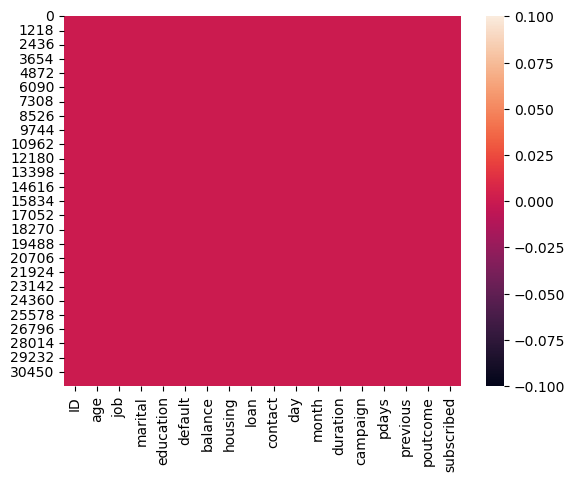

In [6]:
sns.heatmap(df_tr.isnull())
plt.show()

In [7]:
df_tr.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df_tr.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
df_tr.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [11]:
df_tr.drop(['ID'],axis=1,inplace=True)
df_tr.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [13]:
df_tr.drop(['ID'],axis=1,inplace=True)
df_tr.head()

KeyError: "['ID'] not found in axis"

In [15]:
df_tr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [16]:
df_tr['age'].unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

In [17]:
df_tr['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [18]:
df_tr['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [19]:
df_tr['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [20]:
df_tr['default'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
df_tr['balance'].unique()

array([1933,    3,  891, ..., 2787, 8741, 2968], dtype=int64)

In [22]:
df_tr['housing'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df_tr['loan'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df_tr['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [25]:
df_tr['day'].unique()

array([19, 20, 18, 22,  4,  2,  3,  8, 15,  5, 28,  6, 14,  7, 24, 13,  9,
       11, 21, 12, 30, 27, 17, 16, 25, 10,  1, 29, 26, 31, 23],
      dtype=int64)

In [26]:
df_tr['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [27]:
df_tr['pdays'].unique()

array([ -1,  84, 251,   9, 456, 120,  92, 347, 154, 291, 344, 196, 324,
       332, 304, 297, 149, 102, 330, 301, 182,  26, 112, 457, 104, 256,
        90,  94, 135, 113, 360, 224,  98, 153,  82,  18, 343, 337, 365,
        93, 174,  96, 193,  83,  87, 272, 261,  91, 156, 195, 181, 151,
       336, 323, 342,  99, 187, 141, 329, 253, 352, 172, 177, 771, 555,
       119, 190, 362, 189, 351, 254, 169, 357, 111, 317, 367, 160, 116,
       356,  77, 225, 206, 331, 100, 136, 346, 260, 484, 176,  95, 230,
       366, 319, 521, 152, 179, 215, 430, 287, 842, 349, 180, 259, 283,
       275, 348, 140, 202, 370,  89, 184, 213, 308, 255, 188,  86, 161,
       252, 129, 271, 334, 279, 358, 103,   6, 110, 316, 270, 363, 374,
       197, 106, 198, 322, 131, 338, 235, 146, 295,  35, 459, 274, 273,
         4, 105, 143, 326, 183, 229, 369, 241, 280, 318, 173, 132, 201,
       368, 266, 340,  97, 364, 167,   5, 288, 276, 335, 493,  50, 134,
       145,  21, 147, 312, 269, 148, 305, 265,   2, 792, 246, 37

In [28]:
df_tr['previous'].unique()

array([  0,   3,   2,   4,   1,   5,   9,   6,   8,  11,  16,  10,  14,
         7,  12,  23,  13,  18,  30,  27, 275,  20,  15,  17,  19,  22,
        25,  26,  28,  29,  32,  21,  24,  38,  58,  35,  41,  37],
      dtype=int64)

In [29]:
df_tr['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [30]:
df_tr['subscribed'].unique()

array(['no', 'yes'], dtype=object)

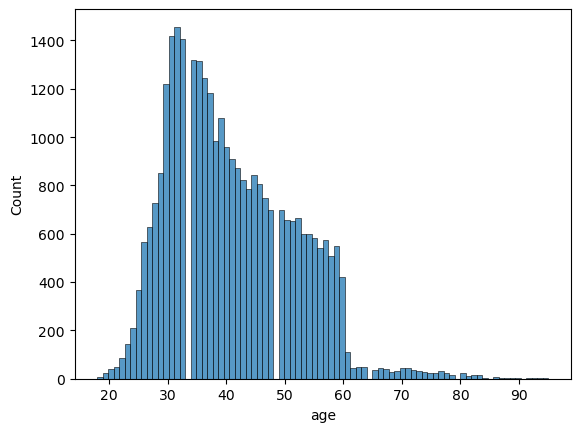

In [31]:
sns.histplot(df_tr['age'])
plt.show()

In [32]:
df_tr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [33]:
print(df_tr['job'].value_counts(),'\n')
print(df_tr['job'].value_counts(normalize=True)*100)

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

blue-collar      21.619743
management       20.978292
technician       16.769362
admin.           11.473441
services          9.173065
retired           4.973615
self-employed     3.548520
entrepreneur      3.185136
unemployed        2.859671
housemaid         2.761715
student           2.006509
unknown           0.650931
Name: job, dtype: float64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
married     60.337473
single      28.192246
divorced    11.470282
Name: marital, dtype: float64


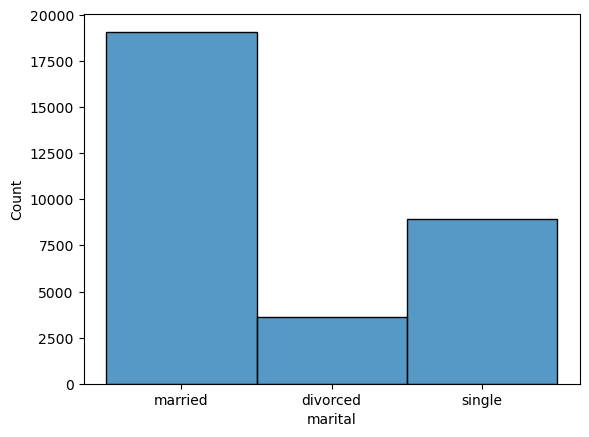

In [34]:
sns.histplot(df_tr['marital'])
print(df_tr['marital'].value_counts())
print(df_tr['marital'].value_counts(normalize=True)*100)

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
secondary    51.265523
tertiary     29.389832
primary      15.192593
unknown       4.152052
Name: education, dtype: float64


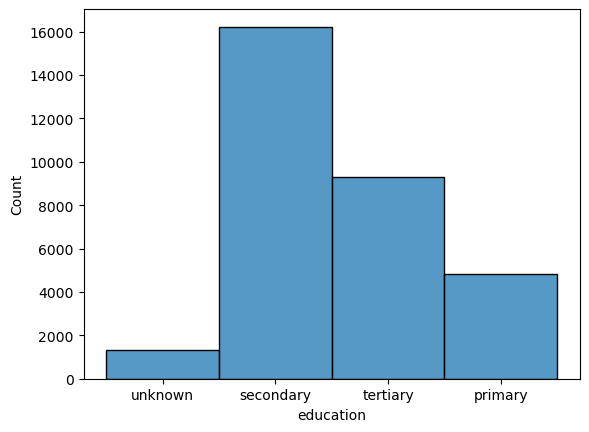

In [35]:
sns.histplot(df_tr['education'])
print(df_tr['education'].value_counts())
print(df_tr['education'].value_counts(normalize=True)*100)

no     31062
yes      585
Name: default, dtype: int64
no     98.151484
yes     1.848516
Name: default, dtype: float64


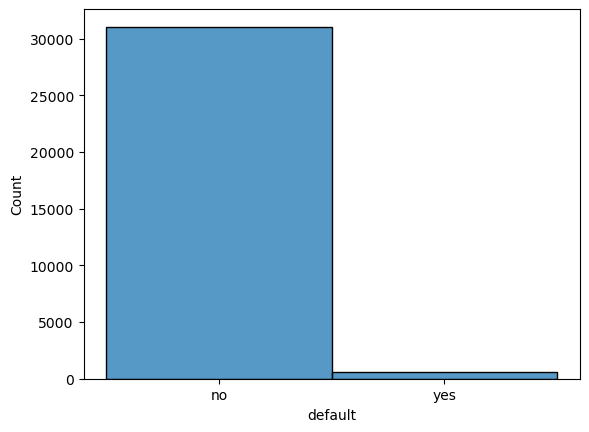

In [36]:
sns.histplot(df_tr['default'])
print(df_tr['default'].value_counts())
print(df_tr['default'].value_counts(normalize=True)*100)

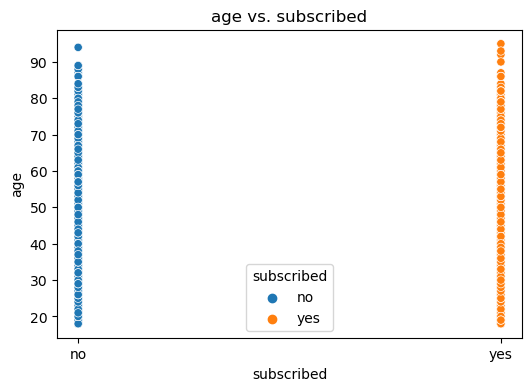

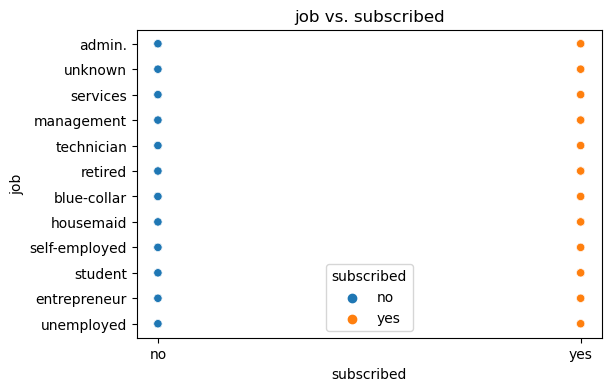

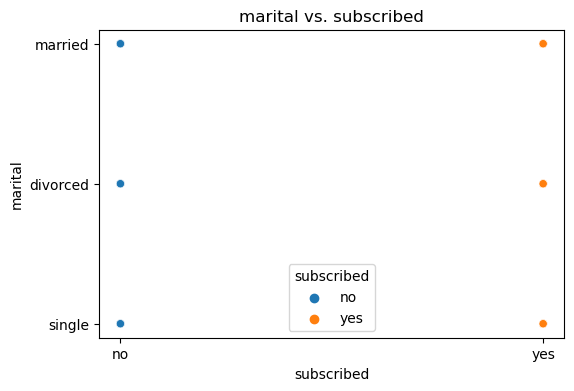

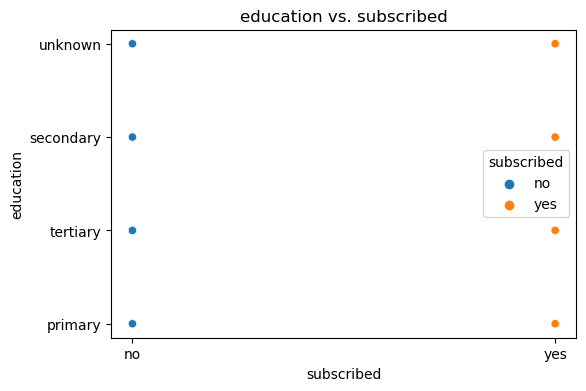

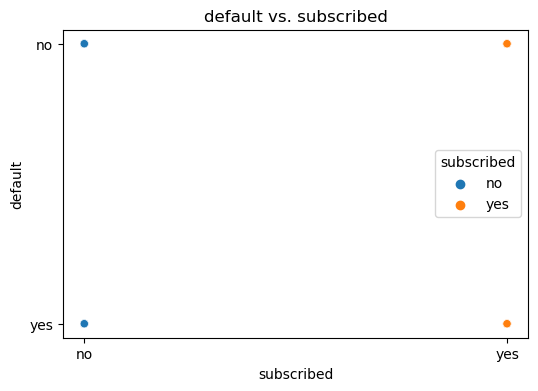

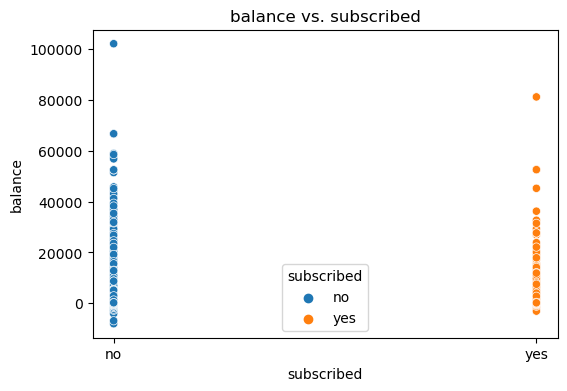

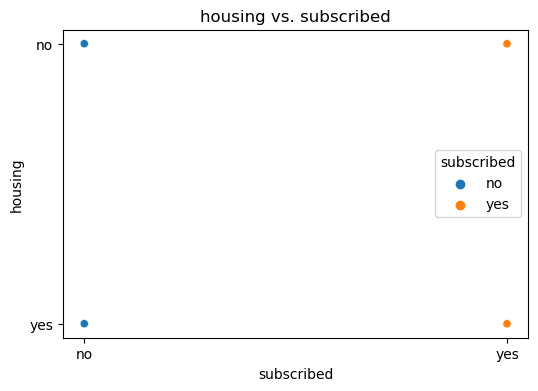

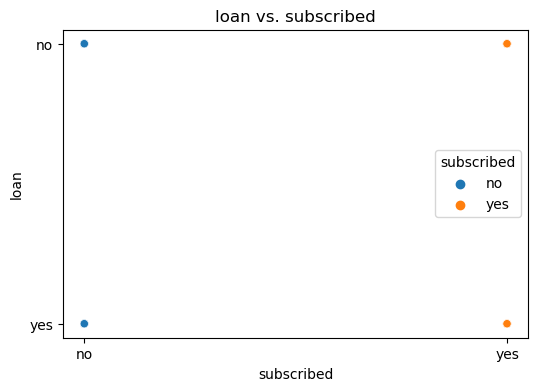

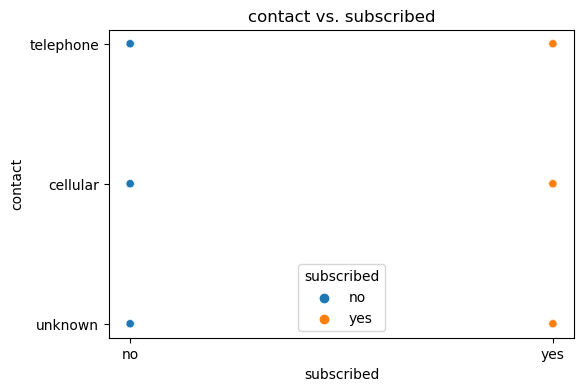

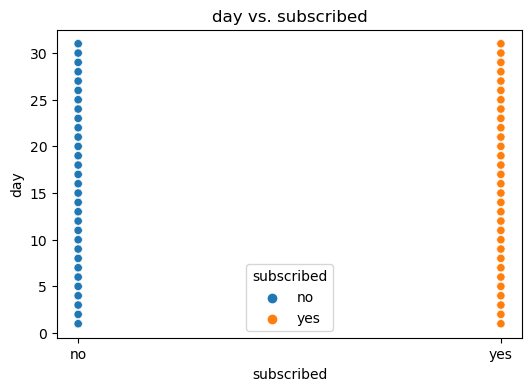

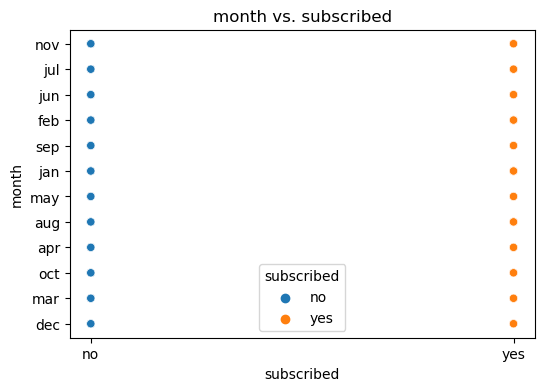

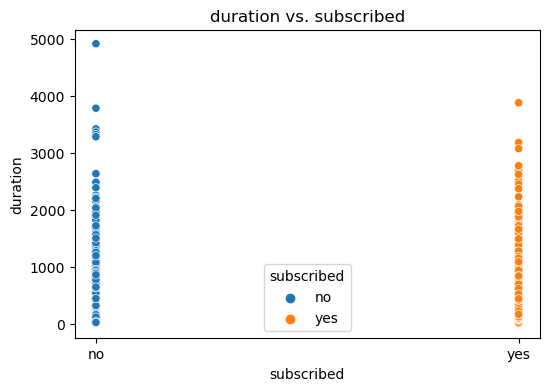

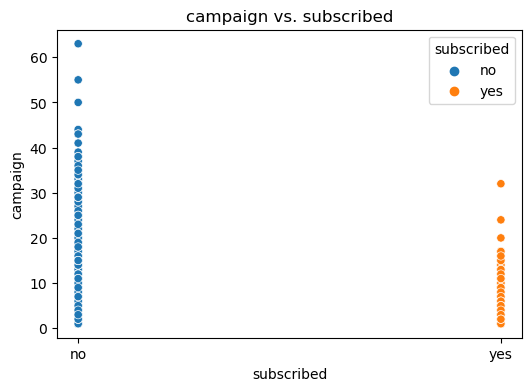

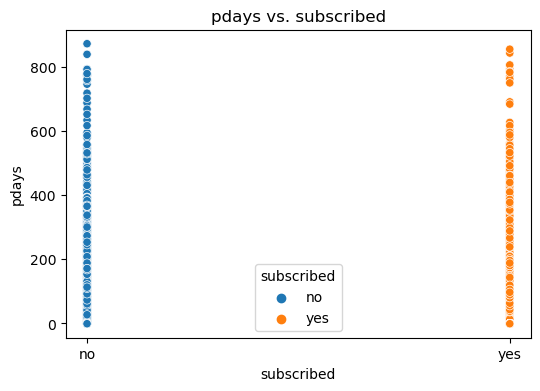

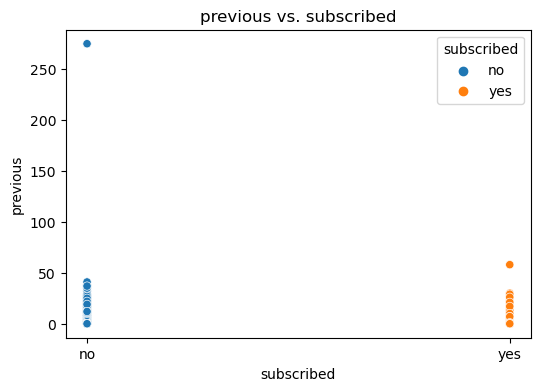

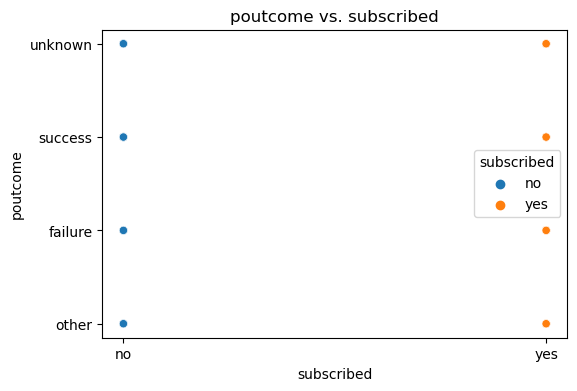

In [37]:
# plot graph for co-relation in Bi Variate Analysis
import seaborn as sns
for col in df_tr.drop(['subscribed'],axis=1):
    plt.figure(figsize=(6,4))
    plt.title(f'{col} vs. subscribed')
    sns.scatterplot(y=df_tr[col],x=df_tr['subscribed'],hue=df_tr['subscribed'])
    plt.show()

In [38]:
plt.figure(figsize=(6,4))
sns.catplot(x='job',y='subscribed',data=df_tr,kind='bar')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x400 with 0 Axes>

In [39]:
plt.figure(figsize=(6,4))
sns.catplot(x='default',y='subscribed',data=df_tr,kind='bar')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x400 with 0 Axes>

In [40]:
plt.figure(figsize=(6,4))
sns.catplot(x='housing',y='subscribed',data=df_tr,kind='bar')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x400 with 0 Axes>

In [41]:
plt.figure(figsize=(6,4))
sns.catplot(x='month',y='subscribed',data=df_tr,kind='bar')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x400 with 0 Axes>